# US StockMarket Manipulation 2021


## Robert Dischinger   codeLouisville   Python_Part_2: Spring 2021
### Stock Market Data Analysis based on Stock Data Up to 2017
#### The Goal of this Project is an attempt to determine a relationship between two unique stocks that have similar ticker symbols.
### Train the Model to try to predict a pattern to the stock price in order to predict a future HIGH price.

In [1]:
### Project Requirements:
#    Research Question and Background: Can ypou predict the future value of a stock based on the performance history.
#    Import Data:  Stock Market history for the Project Stocks   Ford Motor Company   and   Forward Industries
#       This information came from :kaggle.com/datasets
#                                  :https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
#    Cleaning Data:
#    Data Visualization:  Show graphs
#    A Model:  (ie comparing two means with a t-test)
#    Conclusion:  There is not enough evidence to assume that past performance will indicate future performance.

# Ford Motor Company (f)
## About
The Ford Motor Company, commonly known as Ford, is an American multinational automaker that has its main headquarters in Dearborn, Michigan, a suburb of Detroit. It was founded by Henry Ford and incorporated on June 16, 1903. The company sells automobiles and commercial vehicles under the Ford brand, and most luxury cars under the Lincoln brand. Ford also owns Brazilian SUV manufacturer Troller, an 8% stake in Aston Martin of the United Kingdom and a 32% stake in Jiangling Motors. It also has joint-ventures in China, Taiwan, Thailand, Turkey, and Russia. The company is listed on the New York Stock Exchange and is controlled by the Ford family; they have minority ownership but the majority of the voting power. Ford introduced methods for large-scale manufacturing of cars and large-scale management of an industrial workforce using elaborately engineered manufacturing sequences typified by moving assembly lines; by 1914, these methods were known around the world as Fordism. Ford's former UK subsidiaries Jaguar and Land Rover, acquired in 1989 and 2000 respectively, were sold to the Indian automaker Tata Motors in March 2008. Ford owned the Swedish automaker Volvo from 1999 to 2010.
### ford.com


# Forward Industries (ford)

## About
Forward Industries, Inc. operates as a technology distributor. The Company focuses on design, manufacturing, sourcing, and distribution of soft goods, smart products, and IoT technology solutions. Forward Industries serves clients worldwide.
### forwardindustries.com

In [2]:
import pandas as pd
import numpy as np
import os
os.getcwd()
df = pd.read_csv(r'C:\Users\rober\Documents\CodeLouisville\PYTHON 2 Jan2021\PROJECT Spring2021\ProjectStocks\f.us.txt',  header = None)

# Date,Open,High,Low,Close,Volume,OpenInt
df.columns = ["DATE", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME","OPEN_INT"]
print(df)


             DATE     OPEN     HIGH      LOW    CLOSE    VOLUME OPEN_INT
0            Date     Open     High      Low    Close    Volume  OpenInt
1      1977-01-03  0.44917  0.45687  0.44917  0.44917    557345        0
2      1977-01-04  0.44917  0.44917  0.43346  0.44131    917108        0
3      1977-01-05  0.44131  0.44131  0.43346  0.43346    895407        0
4      1977-01-06  0.43346  0.44131  0.43346  0.44131   1002764        0
...           ...      ...      ...      ...      ...       ...      ...
10301  2017-11-06    12.36    12.43     12.3    12.33  20174145        0
10302  2017-11-07    12.35    12.38    12.11    12.16  41526827        0
10303  2017-11-08    12.14    12.16    12.01    12.06  34118367        0
10304  2017-11-09    12.04    12.05    12.04    12.04  26247714        0
10305  2017-11-10       12    12.09    11.98    12.01  35287650        0

[10306 rows x 7 columns]


In [3]:
df.head()


,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,OPEN_INT
0,Date,Open,High,Low,Close,Volume,OpenInt
1,1977-01-03,0.44917,0.45687,0.44917,0.44917,557345,0
2,1977-01-04,0.44917,0.44917,0.43346,0.44131,917108,0
3,1977-01-05,0.44131,0.44131,0.43346,0.43346,895407,0
4,1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764,0


In [4]:
df_f = df 
df_f.head()


,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,OPEN_INT
0,Date,Open,High,Low,Close,Volume,OpenInt
1,1977-01-03,0.44917,0.45687,0.44917,0.44917,557345,0
2,1977-01-04,0.44917,0.44917,0.43346,0.44131,917108,0
3,1977-01-05,0.44131,0.44131,0.43346,0.43346,895407,0
4,1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764,0


In [5]:
df_f = df_f.replace({'DATE' :
{"1977-01-03": "January 3rd, 1977",}})
df_f.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,OPEN_INT
0,Date,Open,High,Low,Close,Volume,OpenInt
1,"January 3rd, 1977",0.44917,0.45687,0.44917,0.44917,557345,0
2,1977-01-04,0.44917,0.44917,0.43346,0.44131,917108,0
3,1977-01-05,0.44131,0.44131,0.43346,0.43346,895407,0
4,1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764,0


In [6]:
df_f = df_f.replace({'DATE' :
{"Date": "Year/MM/DD"}})
df_f = df_f.replace({'OPEN' :
{"Open": "Price__"}})
df_f = df_f.replace({'HIGH' :
{"High": "__in__"}})
df_f = df_f.replace({'LOW' :
{"Low": "__U.S.__"}})
df_f = df_f.replace({'CLOSE' :
{"Close": "_dollars"}})
df_f.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,OPEN_INT
0,Year/MM/DD,Price__,__in__,__U.S.__,_dollars,Volume,OpenInt
1,"January 3rd, 1977",0.44917,0.45687,0.44917,0.44917,557345,0
2,1977-01-04,0.44917,0.44917,0.43346,0.44131,917108,0
3,1977-01-05,0.44131,0.44131,0.43346,0.43346,895407,0
4,1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764,0


In [7]:
#Delete OPEN_INT column which is not needed
df_f.drop(df_f.columns[[6]],axis=1, inplace=True)
df_f.head() 

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,Year/MM/DD,Price__,__in__,__U.S.__,_dollars,Volume
1,"January 3rd, 1977",0.44917,0.45687,0.44917,0.44917,557345
2,1977-01-04,0.44917,0.44917,0.43346,0.44131,917108
3,1977-01-05,0.44131,0.44131,0.43346,0.43346,895407
4,1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764


In [8]:
#Clean "HIGH" to read to two decimal values.
df_f.round({'HIGH': 2})
df_f.head() 
#This is not working???

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,Year/MM/DD,Price__,__in__,__U.S.__,_dollars,Volume
1,"January 3rd, 1977",0.44917,0.45687,0.44917,0.44917,557345
2,1977-01-04,0.44917,0.44917,0.43346,0.44131,917108
3,1977-01-05,0.44131,0.44131,0.43346,0.43346,895407
4,1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764


In [9]:
%matplotlib notebook

In [10]:
import matplotlib as mpl 
mpl.get_backend()

'nbAgg'

In [11]:
import matplotlib.pyplot as plt
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [14]:
# Import a dataframe for Forward Industries
df_ford = pd.read_csv(r'C:\Users\rober\Documents\CodeLouisville\PYTHON 2 Jan2021\PROJECT Spring2021\ProjectStocks\ford.us.txt',  header = None)
df_ford.head(10)

,0,1,2,3,4,5,6
0,Date,Open,High,Low,Close,Volume,OpenInt
1,2005-02-25,6.95,7.35,6.82,7.3,253451,0
2,2005-02-28,7.43,8.17,7.3,7.88,758467,0
3,2005-03-01,8.16,8.74,7.9,8.33,1163155,0
4,2005-03-02,8.55,9.48,8.33,9.1,1886006,0
5,2005-03-03,9.36,9.36,8.37,8.8,730295,0
6,2005-03-04,8.91,8.91,8.46,8.63,204487,0
7,2005-03-07,8.79,9.57,8.65,9.1,754404,0
8,2005-03-08,9.45,9.45,7.93,8.25,742398,0
9,2005-03-09,8.09,8.33,7.51,7.67,708800,0


In [15]:
df_f.info()
df_f.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10306 entries, 0 to 10305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    10306 non-null  object
 1   OPEN    10306 non-null  object
 2   HIGH    10306 non-null  object
 3   LOW     10306 non-null  object
 4   CLOSE   10306 non-null  object
 5   VOLUME  10306 non-null  object
dtypes: object(6)
memory usage: 483.2+ KB


,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
count,10306,10306,10306,10306,10306,10306
unique,10306,3075,3097,3050,3083,9190
top,1979-06-04,0.42552,0.42552,0.42552,0.42552,5076000
freq,1,105,97,106,111,8


In [16]:
#null_counts for df_f
len(df_f) - df_f['HIGH'].count()

0

In [17]:
len(df_f) - df_f['LOW'].count()

0

In [18]:
len(df_f) - df_f['VOLUME'].count()

0

<IPython.core.display.Javascript object>


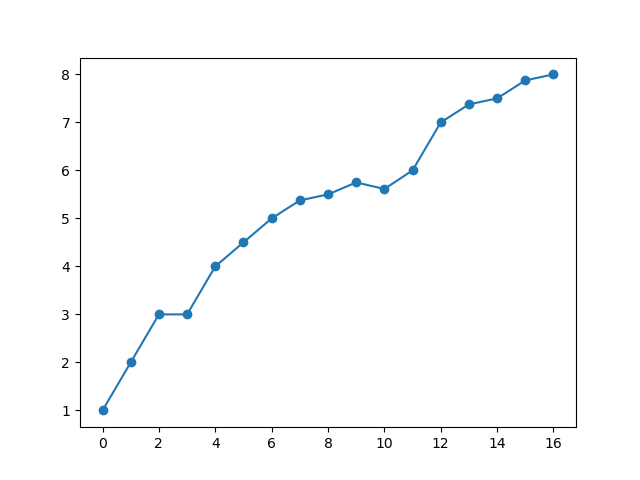

In [19]:
#Testing linear graphing funtion
linear_data = np.array([1, 2, 3, 3, 4, 4.5, 5, 5.375, 5.5, 5.75, 5.6125, 6, 7, 7.375, 7.5, 7.875, 8])     
#df_f['HIGH']
#linear_data2 = np.array([df_f['High']])

plt.figure()
plt.plot(linear_data, '-o')    #, linear_data2, '-o')


In [20]:
from pandas import Series

In [21]:
df_f.head(10)

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,Year/MM/DD,Price__,__in__,__U.S.__,_dollars,Volume
1,"January 3rd, 1977",0.44917,0.45687,0.44917,0.44917,557345
2,1977-01-04,0.44917,0.44917,0.43346,0.44131,917108
3,1977-01-05,0.44131,0.44131,0.43346,0.43346,895407
4,1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764
5,1977-01-07,0.44131,0.44131,0.44131,0.44131,597319
6,1977-01-10,0.44131,0.44917,0.44131,0.44917,825738
7,1977-01-11,0.44917,0.44917,0.44131,0.44131,1138675
8,1977-01-12,0.44131,0.44917,0.44131,0.44131,606455
9,1977-01-13,0.44131,0.44917,0.44131,0.44917,1668608


In [22]:
df_f.tail()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
10301,2017-11-06,12.36,12.43,12.3,12.33,20174145
10302,2017-11-07,12.35,12.38,12.11,12.16,41526827
10303,2017-11-08,12.14,12.16,12.01,12.06,34118367
10304,2017-11-09,12.04,12.05,12.04,12.04,26247714
10305,2017-11-10,12,12.09,11.98,12.01,35287650


In [23]:
type(df_f)

pandas.core.frame.DataFrame

In [24]:
df_f.size

61836

In [25]:
x=df_f['DATE']
y=df_f['HIGH']

In [26]:
print(x)

0               Year/MM/DD
1        January 3rd, 1977
2               1977-01-04
3               1977-01-05
4               1977-01-06
               ...        
10301           2017-11-06
10302           2017-11-07
10303           2017-11-08
10304           2017-11-09
10305           2017-11-10
Name: DATE, Length: 10306, dtype: object


In [27]:
print(y)

0         __in__
1        0.45687
2        0.44917
3        0.44131
4        0.44131
          ...   
10301      12.43
10302      12.38
10303      12.16
10304      12.05
10305      12.09
Name: HIGH, Length: 10306, dtype: object


<IPython.core.display.Javascript object>


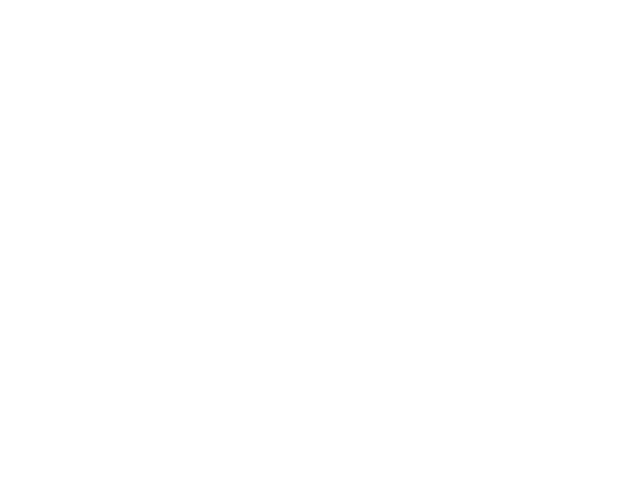

In [28]:
colors = ['green'] * (len(x)-1)
colors.append('red')

plt.figure()
plt.plot(x,y, "*")

ax = plt.gca()
plt.draw()
ax.axis([1,300,1,300])

plt.xlabel("Date")
plt.xticks(rotation = 45) 

plt.ylabel("Price in US Dollars")

plt.title('Ford Motor Company (F) Stock High values')

plt.show()


In [29]:
plt.subplots_adjust(bottom=.25)
plt.subplots_adjust(left=.15)

In [30]:
df_f.shape

(10306, 6)

In [31]:
#x1977=df_f['DATE']   #only prices for 1977
#reload stock data so that it can be divided by date ranges
#   column 0 is used as an index.
df_fdate = pd.read_csv(r'C:\Users\rober\Documents\CodeLouisville\PYTHON 2 Jan2021\PROJECT Spring2021\ProjectStocks\f.us.txt', parse_dates=True,index_col=0)
plt.plot(df_fdate["High"])
plt.show

<function matplotlib.pyplot.show(block=None)>

In [32]:
df_fdate.shape

(10305, 6)

<IPython.core.display.Javascript object>


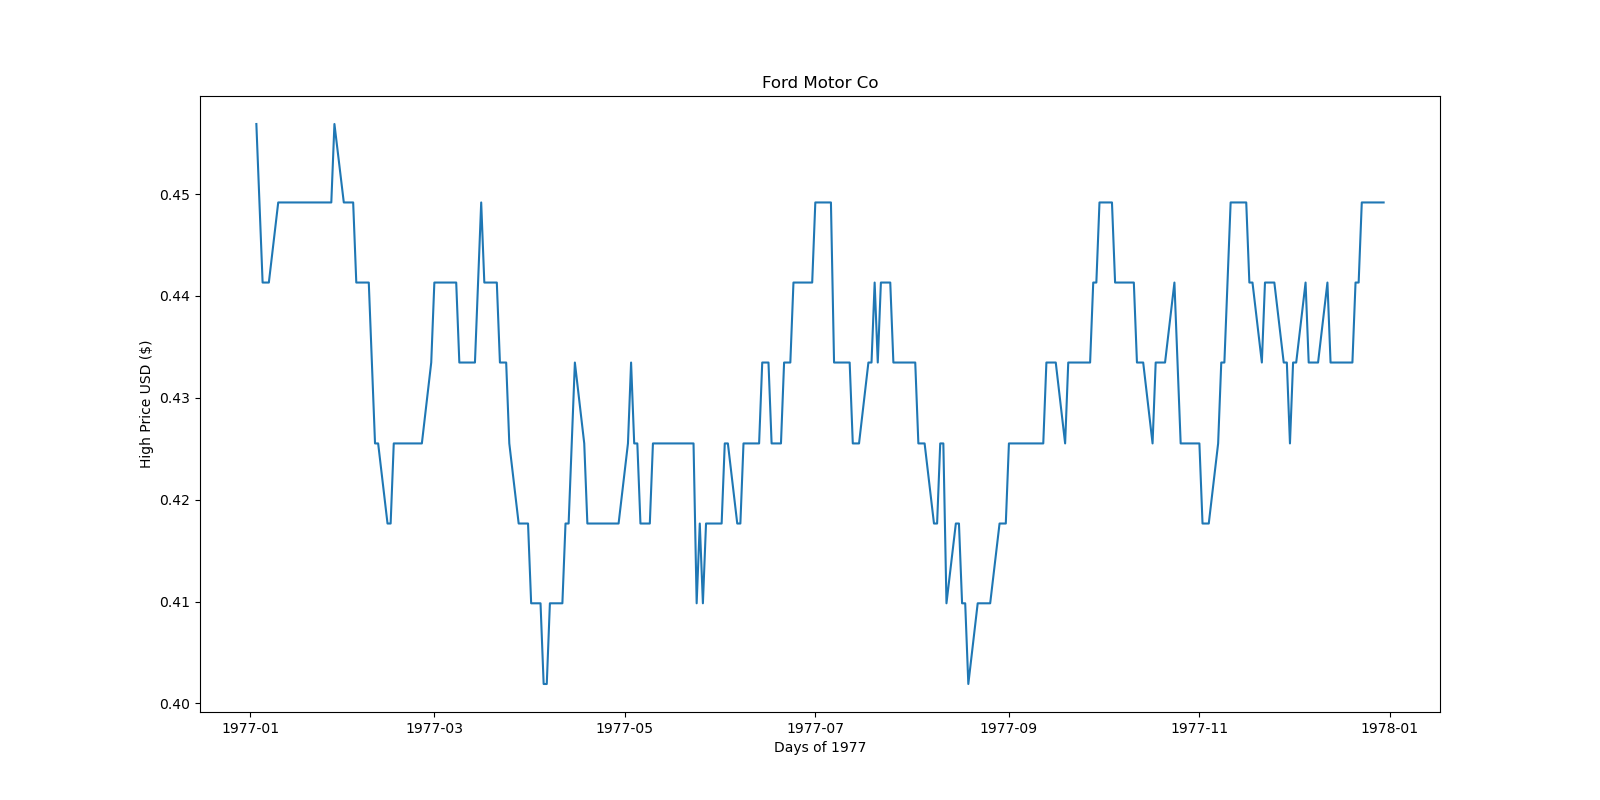

In [33]:
df_f1977 = df_fdate["High"]["1977-01-03":"1977-12-31"]
#df_f1977.plot()
plt.figure(figsize=(16,8))
plt.title('Ford Motor Co')
plt.xlabel('Days of 1977')
plt.ylabel('High Price USD ($)')
plt.plot(df_f1977) 
plt.show()

<IPython.core.display.Javascript object>


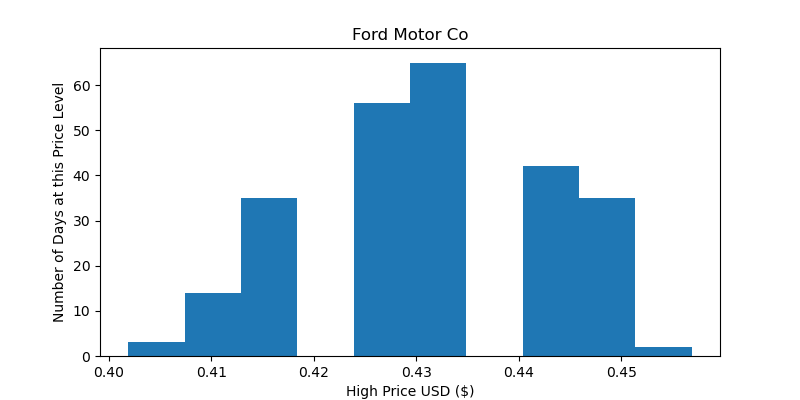

In [36]:
#Plot the same information in a Histogram in order to visualize the price changes during 1977
#df_f1977 = df_fdate["High"]["1977-01-03":"1977-12-31"]
#df_f1977.plot()
plt.figure(figsize=(8,4))
plt.title('Ford Motor Co')
plt.xlabel('High Price USD ($)')
plt.ylabel('Number of Days at this Price Level')
plt.hist(df_f1977) 
plt.show()

In [59]:
df_f1977.shape

(252,)

<IPython.core.display.Javascript object>


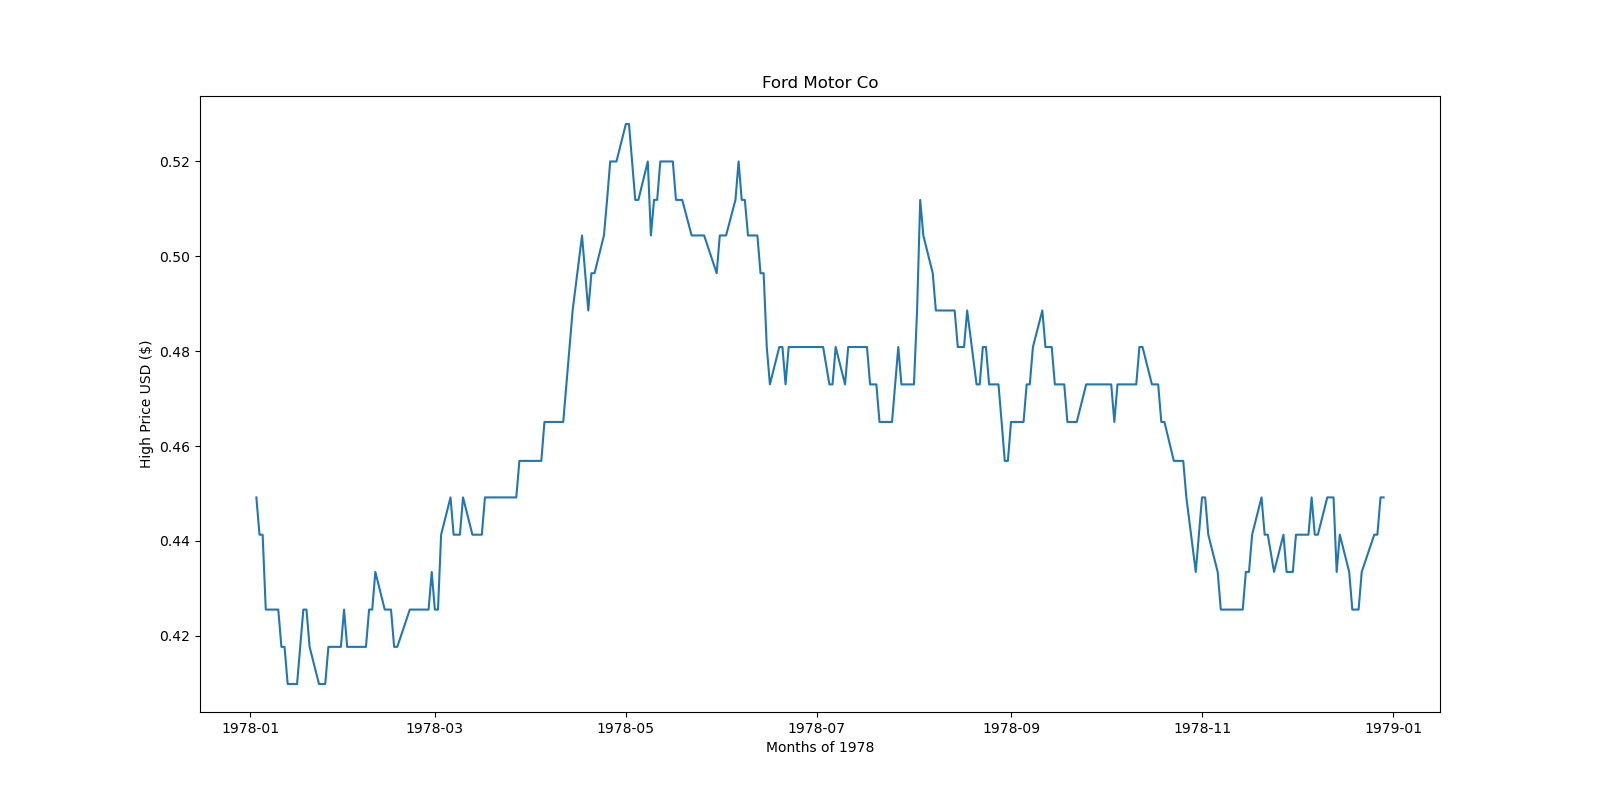

In [64]:
df_f1978 = df_fdate["High"]["1978-01-01":"1978-12-31"]
#df_f1978.plot()
plt.figure(figsize=(16,8))
plt.title('Ford Motor Co')
plt.xlabel('Months of 1978')
plt.ylabel('High Price USD ($)')
plt.plot(df_f1978) 
plt.show()

<IPython.core.display.Javascript object>


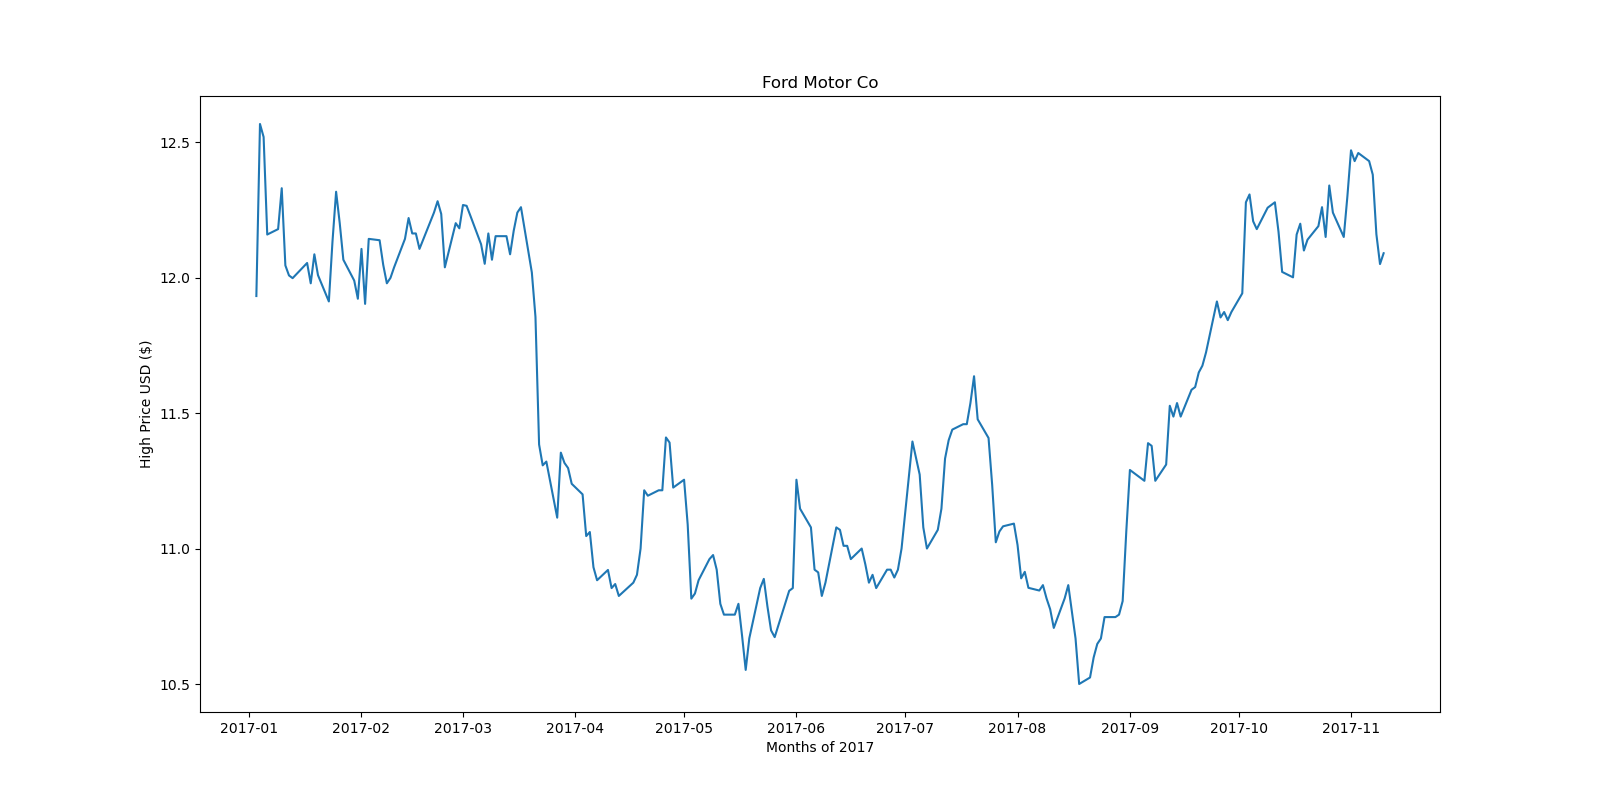

In [65]:
df_f2017 = df_fdate["High"]["2017-01-01":"2017-12-31"]

plt.figure(figsize=(16,8))
plt.title('Ford Motor Co')
plt.xlabel('Months of 2017')
plt.ylabel('High Price USD ($)')
plt.plot(df_f2017) 
plt.show()

<IPython.core.display.Javascript object>


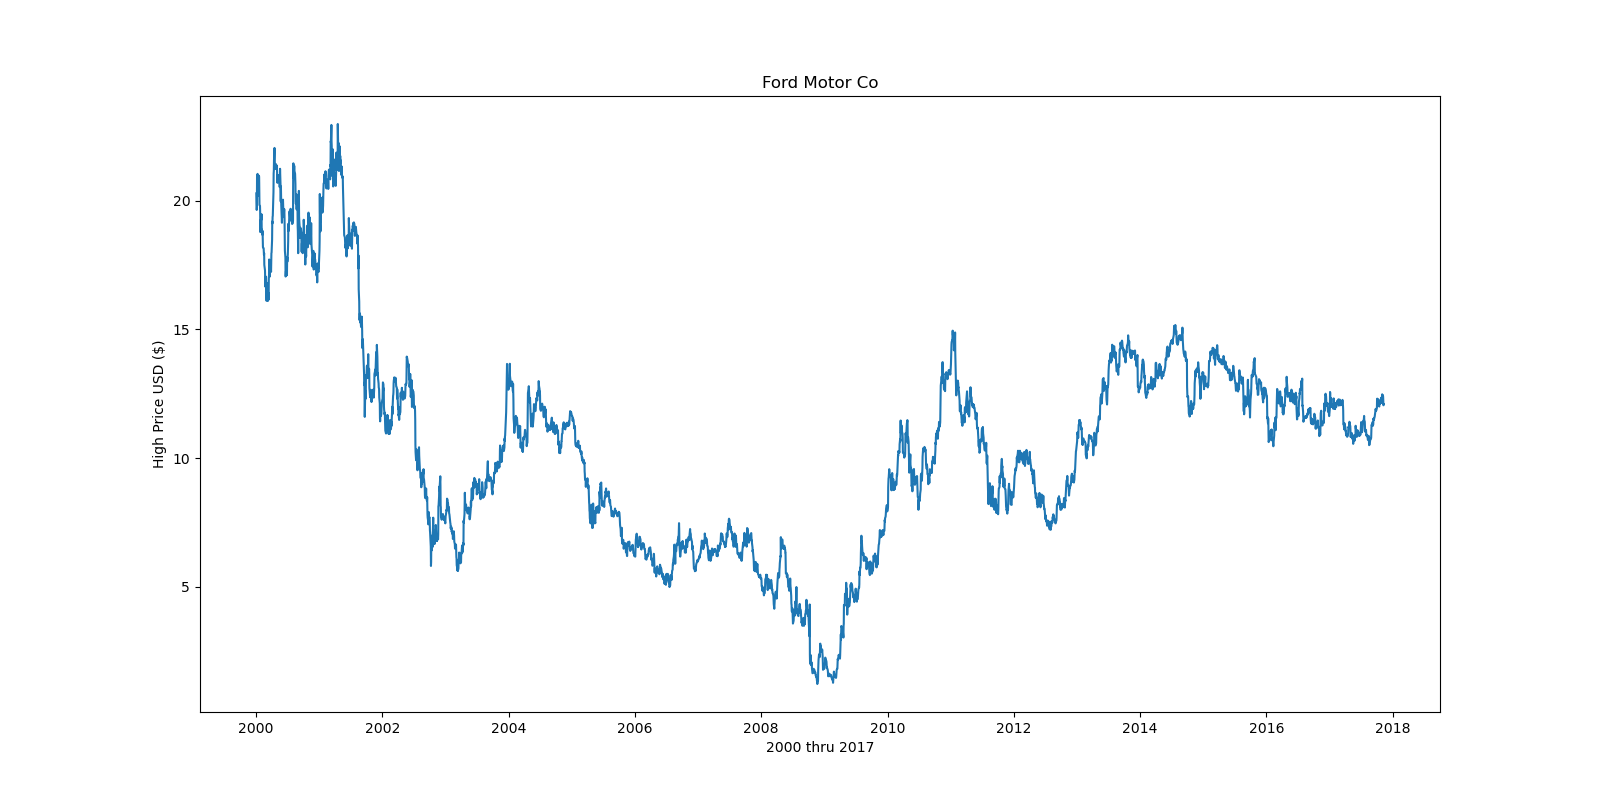

In [66]:
df_f2000_17 = df_fdate["High"]["2000-01-01":"2017-12-31"]

plt.figure(figsize=(16,8))
plt.title('Ford Motor Co')
plt.xlabel('2000 thru 2017')
plt.ylabel('High Price USD ($)')
plt.plot(df_f2000_17) 
plt.show()

In [42]:
#Use machine learning to predict future price fluctuation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [43]:
#Use Dataframe for "High" values of stock between year 2000 and year 2017
df_f2000_17

Date
2000-01-03    20.284
2000-01-04    19.921
2000-01-05    19.639
2000-01-06    19.755
2000-01-07    20.968
               ...  
2017-11-06    12.430
2017-11-07    12.380
2017-11-08    12.160
2017-11-09    12.050
2017-11-10    12.090
Name: High, Length: 4493, dtype: float64

In [44]:
df_f.head(10)

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,Year/MM/DD,Price__,__in__,__U.S.__,_dollars,Volume
1,"January 3rd, 1977",0.44917,0.45687,0.44917,0.44917,557345
2,1977-01-04,0.44917,0.44917,0.43346,0.44131,917108
3,1977-01-05,0.44131,0.44131,0.43346,0.43346,895407
4,1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764
5,1977-01-07,0.44131,0.44131,0.44131,0.44131,597319
6,1977-01-10,0.44131,0.44917,0.44131,0.44917,825738
7,1977-01-11,0.44917,0.44917,0.44131,0.44131,1138675
8,1977-01-12,0.44131,0.44917,0.44131,0.44131,606455
9,1977-01-13,0.44131,0.44917,0.44131,0.44917,1668608


In [45]:
#Change the index to be the DATE
df_f = df_f.set_index((df_f['DATE'].values))
df_f

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
Year/MM/DD,Year/MM/DD,Price__,__in__,__U.S.__,_dollars,Volume
"January 3rd, 1977","January 3rd, 1977",0.44917,0.45687,0.44917,0.44917,557345
1977-01-04,1977-01-04,0.44917,0.44917,0.43346,0.44131,917108
1977-01-05,1977-01-05,0.44131,0.44131,0.43346,0.43346,895407
1977-01-06,1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764
...,...,...,...,...,...,...
2017-11-06,2017-11-06,12.36,12.43,12.3,12.33,20174145
2017-11-07,2017-11-07,12.35,12.38,12.11,12.16,41526827
2017-11-08,2017-11-08,12.14,12.16,12.01,12.06,34118367
2017-11-09,2017-11-09,12.04,12.05,12.04,12.04,26247714


In [46]:
#Add a name for the index (DATE)
df_f.index.name = 'DATE'
df_f.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
DATE,,,,,,
Year/MM/DD,Year/MM/DD,Price__,__in__,__U.S.__,_dollars,Volume
"January 3rd, 1977","January 3rd, 1977",0.44917,0.45687,0.44917,0.44917,557345
1977-01-04,1977-01-04,0.44917,0.44917,0.43346,0.44131,917108
1977-01-05,1977-01-05,0.44131,0.44131,0.43346,0.43346,895407
1977-01-06,1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764


In [47]:
#Drop the "DATE" column that is no longer needed
df_f = df_f.drop(columns=['DATE'])
df_f.head(10)

,OPEN,HIGH,LOW,CLOSE,VOLUME
DATE,,,,,
Year/MM/DD,Price__,__in__,__U.S.__,_dollars,Volume
"January 3rd, 1977",0.44917,0.45687,0.44917,0.44917,557345
1977-01-04,0.44917,0.44917,0.43346,0.44131,917108
1977-01-05,0.44131,0.44131,0.43346,0.43346,895407
1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764
1977-01-07,0.44131,0.44131,0.44131,0.44131,597319
1977-01-10,0.44131,0.44917,0.44131,0.44917,825738
1977-01-11,0.44917,0.44917,0.44131,0.44131,1138675
1977-01-12,0.44131,0.44917,0.44131,0.44131,606455


In [48]:
#drop row one that is causing errors
df_f = df_f.drop('Year/MM/DD', axis=0)
df_f.head(10)

,OPEN,HIGH,LOW,CLOSE,VOLUME
DATE,,,,,
"January 3rd, 1977",0.44917,0.45687,0.44917,0.44917,557345
1977-01-04,0.44917,0.44917,0.43346,0.44131,917108
1977-01-05,0.44131,0.44131,0.43346,0.43346,895407
1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764
1977-01-07,0.44131,0.44131,0.44131,0.44131,597319
1977-01-10,0.44131,0.44917,0.44131,0.44917,825738
1977-01-11,0.44917,0.44917,0.44131,0.44131,1138675
1977-01-12,0.44131,0.44917,0.44131,0.44131,606455
1977-01-13,0.44131,0.44917,0.44131,0.44917,1668608


### MODELING :  Attempt to Predict Future Stock Price Based on Historical Data

In [67]:
# Create a Target Column to show predicted High Price based on Historical Data.
#NOTE: This is not considered a good predictor of stock worth.

df_f['Price_Increase'] = np.where(df_f['HIGH'].shift(-1) > df_f['HIGH'],1,0)
df_f

,OPEN,HIGH,LOW,CLOSE,VOLUME,Price_Increase
DATE,,,,,,
"January 3rd, 1977",0.44917,0.45687,0.44917,0.44917,557345,0
1977-01-04,0.44917,0.44917,0.43346,0.44131,917108,0
1977-01-05,0.44131,0.44131,0.43346,0.43346,895407,0
1977-01-06,0.43346,0.44131,0.43346,0.44131,1002764,0
1977-01-07,0.44131,0.44131,0.44131,0.44131,597319,1
...,...,...,...,...,...,...
2017-11-06,12.36,12.43,12.3,12.33,20174145,0
2017-11-07,12.35,12.38,12.11,12.16,41526827,0
2017-11-08,12.14,12.16,12.01,12.06,34118367,0


In [68]:
#Split the Data Set into a feature and a target data set
feature = df_f.iloc[:,0:df_f.shape[1]-1].values
target = df_f.iloc[:,df_f.shape[1]-1].values

In [69]:
#Split the data into 80% training data and 20% test data
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.2)

In [70]:
#Create and train the model (DecisionTreeClassifier)
tree = DecisionTreeClassifier().fit(feature_train, target_train)

print(tree.score(feature_test, target_test))

0.5754488112566715


In [71]:
#Show the model's prediction
tree_prediction = tree.predict(feature_test)
print(tree_prediction)

[1 0 0 ... 0 0 1]


In [77]:
tree_prediction01 = tree_prediction
print(tree_prediction01)

[1 0 0 ... 0 1 0]


In [72]:
#Show the actual Values
target_test

array([1, 0, 0, ..., 0, 1, 1])

In [78]:
target_test01 = target_test
print(target_test01)

[1 1 0 ... 0 1 0]


### Compare the feature_test verses the target_test

In [79]:
#output is used to show which predictions did not match the test
output01 = (tree_prediction01 -target_test01)
print(output01)

[ 0 -1  0 ...  0  0  0]


In [80]:
#Count the instances that are not equal to ZERO (0)
np.count_nonzero(output01)

440

### Check to see if there is a significantly different result if we change to feature/target ratio

In [87]:
#Split the Data Set into a feature02 and a target02 data set
feature02 = df_f.iloc[:,0:df_f.shape[1]-1].values
target02 = df_f.iloc[:,df_f.shape[1]-1].values

In [89]:
#Split the data into 90% training data and 10% test data to see if results change
feature_train02, feature_test02, target_train02, target_test02 = train_test_split(feature02, target02, test_size = 0.1)

In [90]:
#Create and train the model (DecisionTreeClassifier)
tree02 = DecisionTreeClassifier().fit(feature_train02, target_train02)

print(tree.score(feature_test02, target_test02))

0.9612027158098934


In [91]:
#Show the model's prediction
tree_prediction02 = tree.predict(feature_test02)
print(tree_prediction02)

[0 0 0 ... 0 0 1]


In [92]:
#Show the actual Values
target_test02

array([0, 0, 0, ..., 0, 0, 1])

In [93]:
target_test02 = target_test
print(target_test02)

[1 0 0 ... 1 1 0]


In [94]:
output02 = (tree_prediction02 -target_test02)
print(output02)

[-1  0  0 ... -1 -1  1]


In [95]:
#Count the instances that are not equal to ZERO (0)
np.count_nonzero(output02)

501

In [ ]:
#import Forward Industries information
#Compare "HIGH" price history to Ford Motor Company
